# **IMPORTANDO BASE DE DADOS**

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
dados = pd.read_csv('tips.csv')

In [162]:
dados.shape

(244, 6)

In [163]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [164]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# **TRADUÇÃO**

In [165]:
dados.columns = ['valor_da_conta', 'gorjeta', 'sobremesa', 'dia', 'hora_do_dia', 'total_de_pessoas']

In [166]:
dados.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [167]:
dados['hora_do_dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [168]:
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [169]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [170]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [171]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [172]:
dados.dia = dados['dia'].map(dias)

In [173]:
dados.sobremesa = dados['sobremesa'].map(sim_nao)

In [174]:
dados['hora_do_dia'] = dados['hora_do_dia'].map(hora)

In [175]:
dados

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# **ANALISE 1** 

In [176]:
dados.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia', 'hora_do_dia',
       'total_de_pessoas'],
      dtype='object')

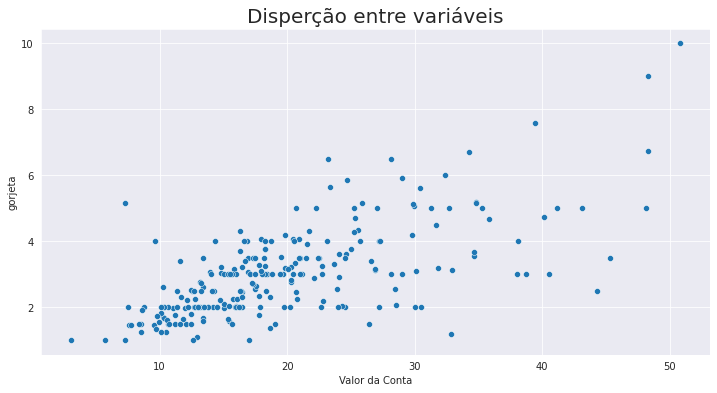

In [177]:
sns.set_style("darkgrid")

fig = plt.figure(figsize=(12,6))

ax = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=dados)
ax.set_title('Disperção entre variáveis', fontsize=20)
ax.set_xlabel('Valor da Conta')
ax

## **CRIANDO A COLUNA PORCENTAGEM**

In [178]:
dados['porcentagem'] = dados['gorjeta'] / dados['valor_da_conta']

In [179]:
dados.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [180]:
dados.porcentagem = dados.porcentagem.round(2)

In [181]:
dados.style.format({'porcentagem': '{:.2%}'})

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas,porcentagem
0,16.990000,1.010000,Não,Domingo,Jantar,2,6.00%
1,10.340000,1.660000,Não,Domingo,Jantar,3,16.00%
2,21.010000,3.500000,Não,Domingo,Jantar,3,17.00%
3,23.680000,3.310000,Não,Domingo,Jantar,2,14.00%
4,24.590000,3.610000,Não,Domingo,Jantar,4,15.00%
5,25.290000,4.710000,Não,Domingo,Jantar,4,19.00%
6,8.770000,2.000000,Não,Domingo,Jantar,2,23.00%
7,26.880000,3.120000,Não,Domingo,Jantar,4,12.00%
8,15.040000,1.960000,Não,Domingo,Jantar,2,13.00%
9,14.780000,3.230000,Não,Domingo,Jantar,2,22.00%


In [182]:
dados.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


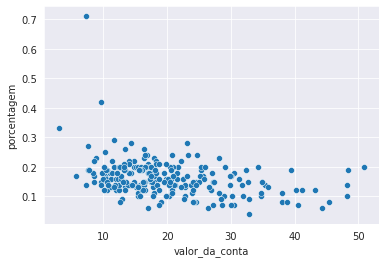

In [183]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=dados)

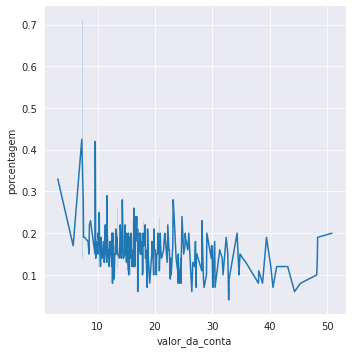

In [184]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=dados)

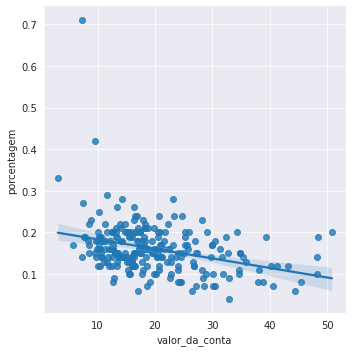

In [185]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', data=dados)

# **ANALISE 2**

In [186]:
dados.query("sobremesa == 'Sim'").describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [187]:
dados.query("sobremesa == 'Não'").describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


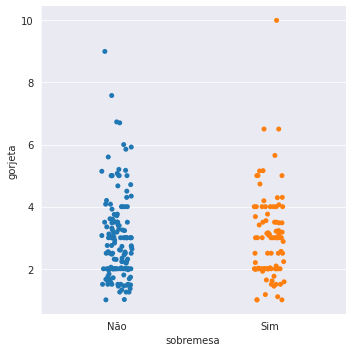

In [188]:
ax = sns.catplot(x='sobremesa', y='gorjeta', data=dados)

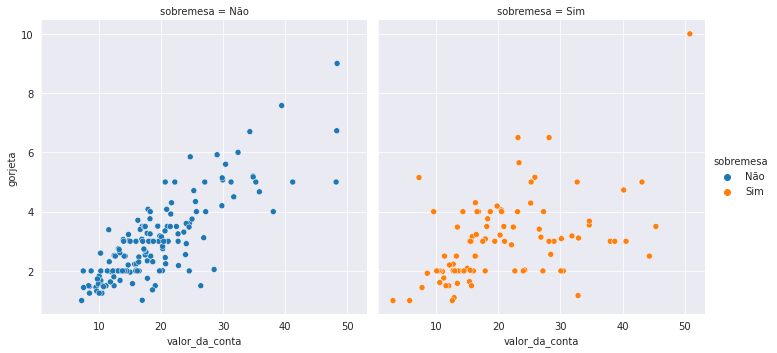

In [189]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',col='sobremesa',data=dados)

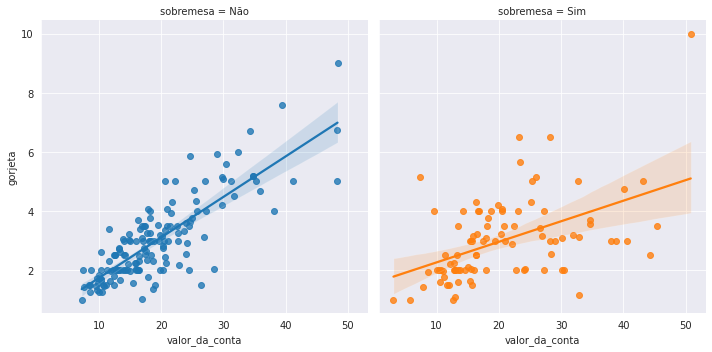

In [190]:
ax = sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)

## **RANKSUMS**

In [191]:
from scipy.stats import ranksums

In [192]:
sobremesa = dados.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = dados.query("sobremesa == 'Não'").porcentagem

In [193]:
stat_test, p_valor = ranksums(sobremesa, sem_sobremesa)
print(stat_test, p_valor)

-0.6331073145314825 0.5266635660124415


In [194]:
significancia = 0.05
p_valor <= significancia 

False

**A distribuição da gorjeta é igual nos dois grupos(com sobremesa/ sem sobremesa)**

# **ANALISE 3**

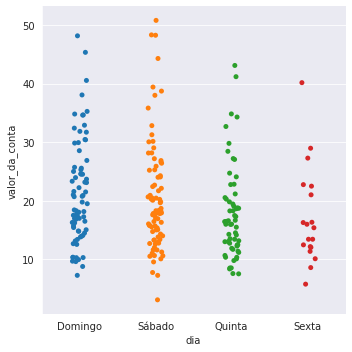

In [195]:
ax = sns.catplot(x='dia', y='valor_da_conta', data=dados)

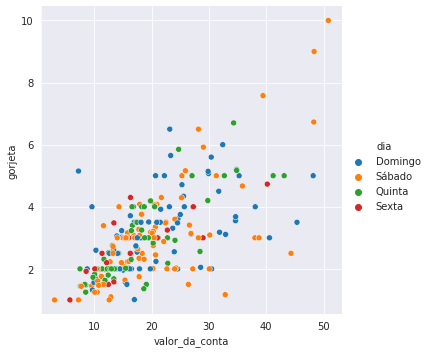

In [196]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia',data=dados)

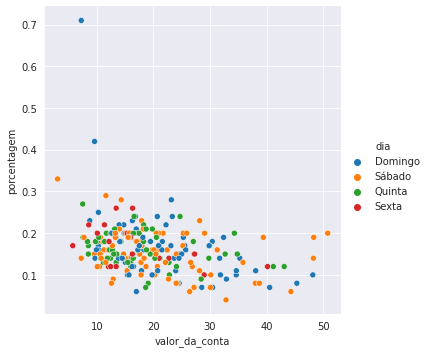

In [197]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia',data=dados)

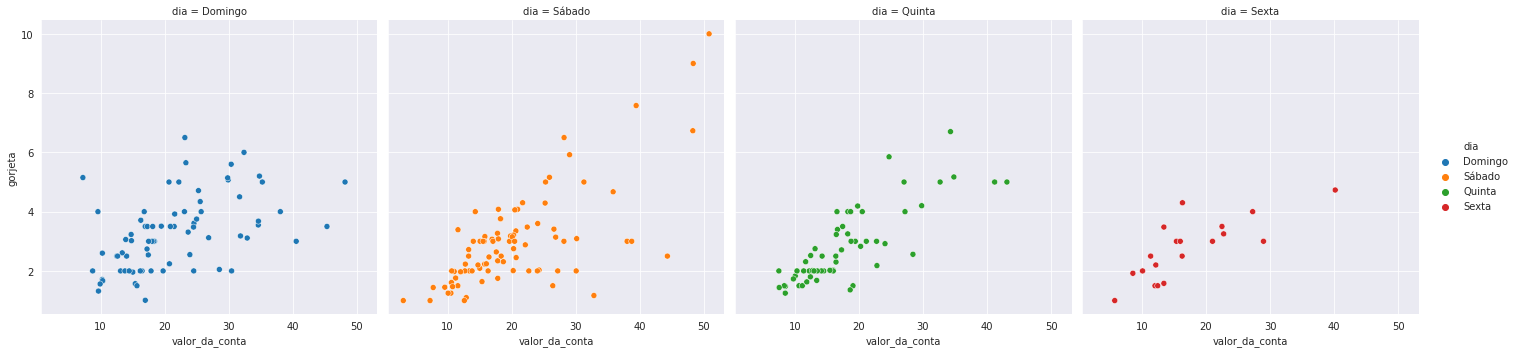

In [198]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia',col='dia', data=dados)

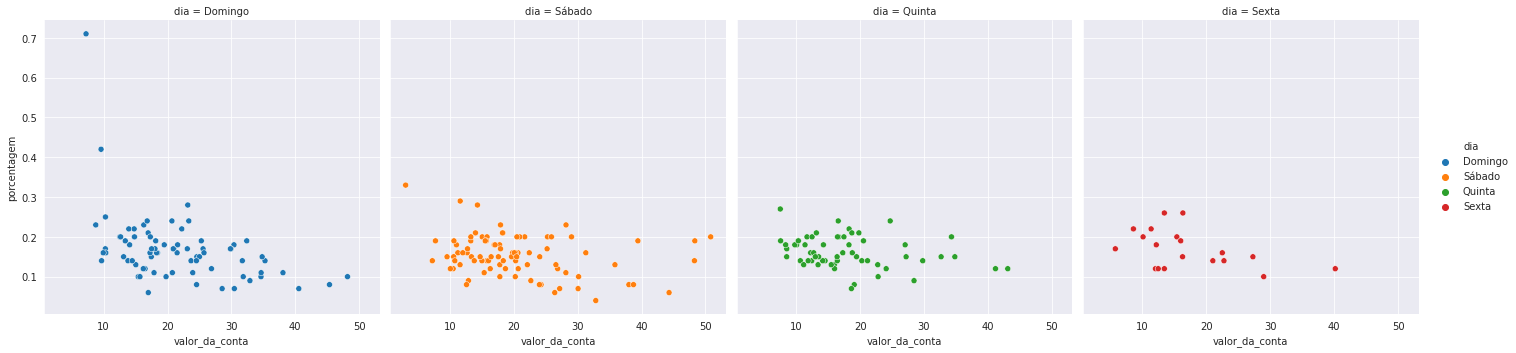

In [199]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem',hue='dia',col='dia',data=dados)

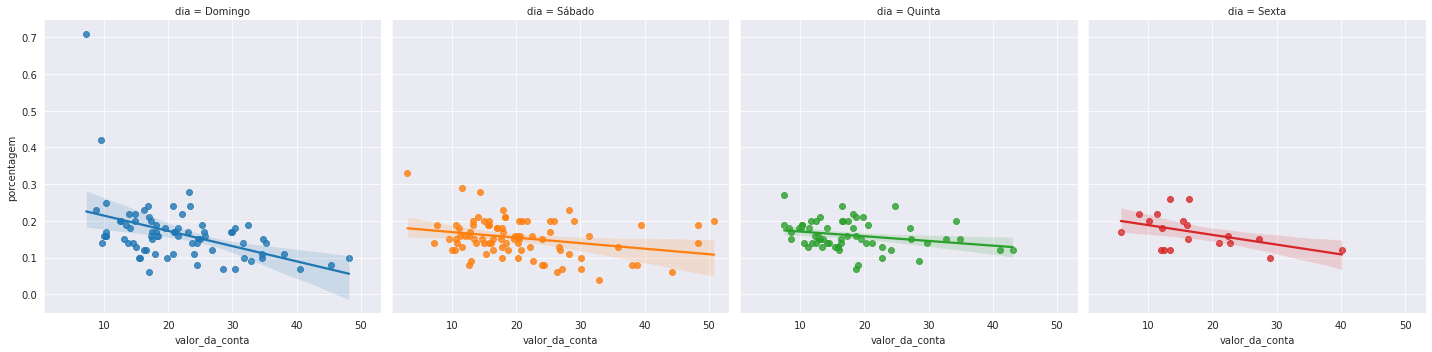

In [200]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem',hue='dia',col='dia',data=dados)

In [201]:
dados.total_de_pessoas.round()

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: total_de_pessoas, Length: 244, dtype: int64

In [202]:
dados.groupby(by='dia').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [203]:
dados.dia.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

## **RUNKSUMS**

In [204]:
valor_conta_domingo = dados.query("dia == 'Domingo'").valor_da_conta

In [205]:
valor_conta_sabado = dados.query("dia == 'Sábado'").valor_da_conta

In [206]:
stat_test, p_valor = ranksums(valor_conta_domingo, valor_conta_sabado)
print(stat_test, p_valor)

0.9198084864360142 0.3576728477868443


In [207]:
significancia = 0.05
p_valor <= significancia 

False

**a distribuição do valor da conta é igual no sabado e no domingo**

# **ANALISE 4**

In [208]:
dados.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

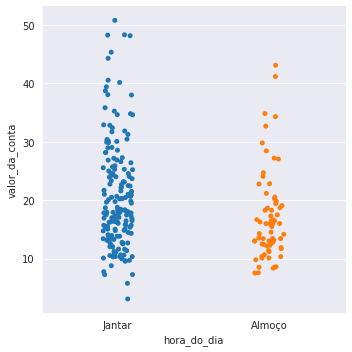

In [209]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', data=dados)

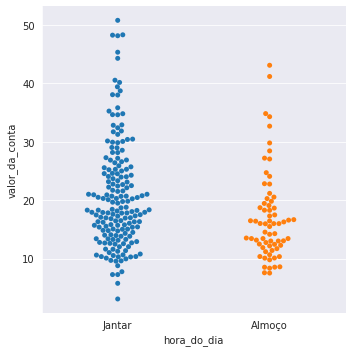

In [210]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm',data=dados)

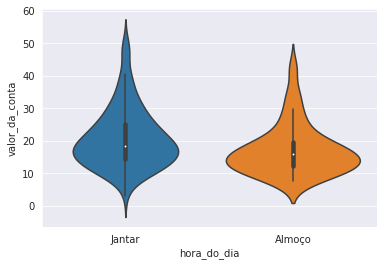

In [211]:
ax = sns.violinplot(x='hora_do_dia', y='valor_da_conta',data=dados)

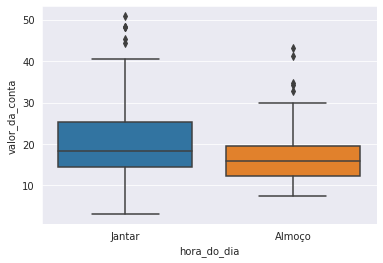

In [212]:
ax = sns.boxplot(x='hora_do_dia', y='valor_da_conta',data=dados)

In [213]:
almoco = dados.query("hora_do_dia == 'Almoço'").valor_da_conta
almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


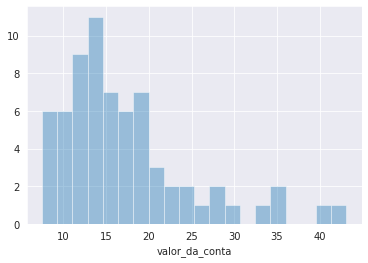

In [214]:
 ax = sns.distplot(almoco, bins=20, kde=False)

In [215]:
jantar = dados.query("hora_do_dia == 'Jantar'").valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


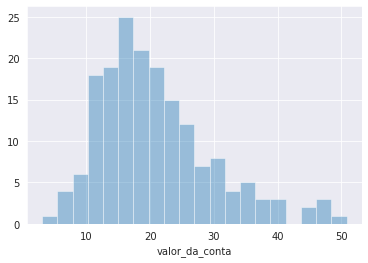

In [216]:
 ax = sns.distplot(jantar, bins=20, kde=False)

In [217]:
dados.groupby(by='hora_do_dia').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [218]:
dados.hora_do_dia.value_counts()

Jantar    176
Almoço     68
Name: hora_do_dia, dtype: int64

## **RANKSUMS**

In [219]:
stat_test, p_valor = ranksums(jantar, almoco)
print(stat_test, p_valor)

3.2438872807262955 0.0011791039723641672


In [220]:
significancia = 0.05
p_valor <= significancia 

True

**descartar a hipotese nula, a distribuição do valor da conta do jantar e da noite não são iguais**

In [227]:
porcentagem_almoco = dados.query("hora_do_dia == 'Almoço'").porcentagem

In [228]:
porcentagem_jantar = dados.query("hora_do_dia == 'Jantar'").porcentagem

In [233]:
stat_test, p_valor = ranksums(porcentagem_almoco, porcentagem_jantar)
print(stat_test, p_valor)

1.1258018532735787 0.2602493995587126


In [234]:
significancia = 0.05
p_valor <= significancia

False

****usar a hipotese nula, a distribuição da taxa da gorjeta do jantar e da noite são iguais****